# Logistic Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# fix the error
sns.set_theme(style="whitegrid")

Logistic regression model estimated probability

$\hat{p}=h_\theta(x)=\sigma(x^T \theta)$


The logistic function

$\sigma(t)=\frac{1}{1+e^{-t}}$ where $t = x^T \theta$

$\hat{y}=\begin{cases} 0 & \text{if } \hat{p}<0.5 \\ 1 & \text{if } \hat{p}\geq 0.5 \end{cases}$

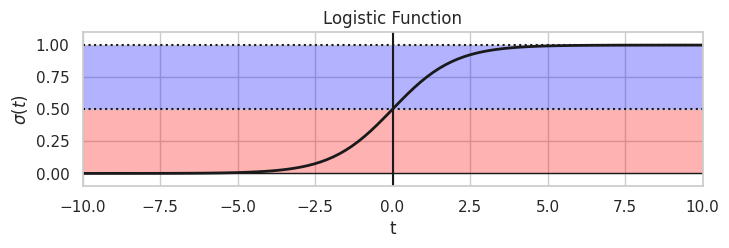

In [3]:
t = np.linspace(-10, 10, 100)
s = 1 / (1 + np.exp(-t))

# logistic function
_, ax = plt.subplots(figsize=(8, 2))
ax.plot(t, s, lw=2, color='k')

ax.axvline(0, color='k')
ax.axhline(y=0, color='k', lw=1)
ax.axhline(y=0.5, ls='dotted', color='k')
ax.axhline(y=1, ls='dotted', color='k')
ax.axhspan(0, 0.5, facecolor='red', alpha=0.3)
ax.axhspan(0.5, 1, facecolor='blue', alpha=0.3)

ax.set_xlabel('t'), ax.set_ylabel('$\\sigma(t)$')
ax.set_xlim(-10, 10), ax.set_ylim(-0.1, 1.1)
ax.set_title('Logistic Function')
plt.show()

# logit
# logit = np.log(s / (1 - s))
# _, ax = plt.subplots(figsize=(2, 8))
# ax.plot(s, logit, lw=2, color='k')
# ax.set_title('Logit Function')
# ax.set_xlabel('$\\sigma(t)$')
# ax.set_ylabel('$logit(\\sigma(t))$')

# plt.show()

Just to be clear here, 

- **direct result**: $t = x^T \theta$, the direct result of multiplying the feature vector $x$ by the weight vector $\theta$.
- **the logistic function**: $\hat{p} = \sigma(t)$ is the logistic function where the range is between 0 and 1 (the probability of getting 1)
- **the prediction**: finally, if $t < 0$, then $\hat{p} < 0.5$, then $\hat{y}=0$ - $\hat{y}$ is the prediction of the model.
- **the cost function**:
    - For a single training instance: $c(\theta) = -y\log(\hat{p})-(1-y)\log(1-\hat{p})$
    - For the whole training  (the **Log Loss**): $J(\theta) = -\frac{1}{m}\sum_{i=1}^m[y^{(i)}\log(\hat{p}^{(i)})+(1-y^{(i)})\log(1-\hat{p}^{(i)})]$
        - the partial derivative (how much of cost changes if we change $\theta_j$ just slightly):
        $$\frac{\partial}{\partial \theta_j}J(\theta) = \frac{1}{m}\sum_{i=1}^m(\sigma(x^{(i)})-y^{(i)})x_j^{(i)}$$
    - note that $y$ is from the actual training set, and $\hat{p}$ is from the model's prediction (pretty smart :o)
        - if $y$ is 1 - as 

/tmp/ipykernel_2675186/1698189771.py:6: RuntimeWarning: divide by zero encountered in log
  c_1 = -y_1*np.log(p) - (1-y_1)*np.log(1-p)
/tmp/ipykernel_2675186/1698189771.py:6: RuntimeWarning: invalid value encountered in multiply
  c_1 = -y_1*np.log(p) - (1-y_1)*np.log(1-p)
/tmp/ipykernel_2675186/1698189771.py:7: RuntimeWarning: divide by zero encountered in log
  c_0 = -y_0*np.log(p) - (1-y_0)*np.log(1-p)
/tmp/ipykernel_2675186/1698189771.py:7: RuntimeWarning: invalid value encountered in multiply
  c_0 = -y_0*np.log(p) - (1-y_0)*np.log(1-p)


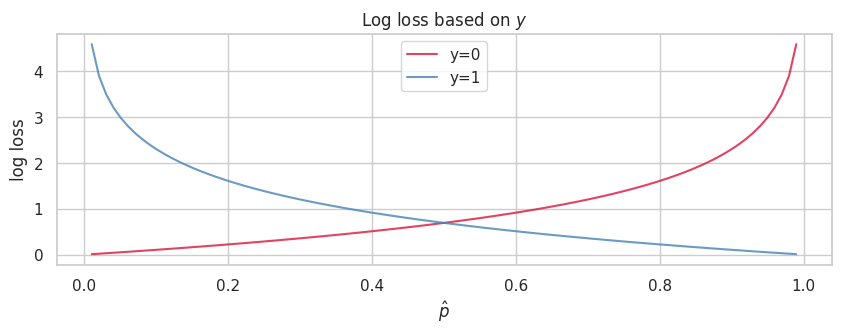

In [4]:
p = np.linspace(0, 1, 100).reshape(-1,1)
y_1 = np.ones((100, 1))
y_0 = np.zeros((100, 1))


c_1 = -y_1*np.log(p) - (1-y_1)*np.log(1-p)
c_0 = -y_0*np.log(p) - (1-y_0)*np.log(1-p)

_, ax = plt.subplots(figsize=(10, 3))
ax.plot(p, c_0, color='crimson', label='y=0', alpha=0.8)
ax.plot(p, c_1, color='steelblue', label='y=1', alpha=0.8)
ax.set_xlabel('$\hat{p}$')
ax.set_ylabel('log loss')
ax.set_title('Log loss based on $y$')
plt.legend()
plt.show()


Here's the thing:

- if $y == 1$, then we expect $\hat{p}$ to be high, and to be penalized less. As we see here, it's penalized less and less as $\hat{p}$ gets closer to 1.
    - but if $\hat{p}$ is low (indicating "lesser probability of getting 1"), then we want to penalize it more and more. As we see here, it's penalized more and more as $\hat{p}$ gets closer to 0.

Similarly, when $y == 0$, the opposite happens.

## Petal Width

In [5]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()

X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int32) # 1 if Iris-Virginica, else 0

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

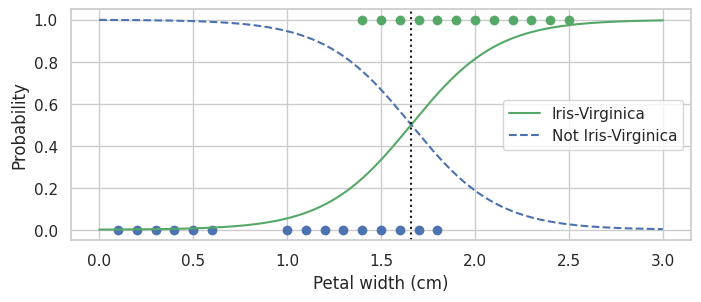

In [6]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

X_false = np.unique(X[~y.astype(bool)])
X_true = np.unique(X[y.astype(bool)])

_, ax = plt.subplots(figsize=(8, 3))
ax.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
ax.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
ax.scatter(X_false, np.zeros(len(X_false)), color='b')
ax.scatter(X_true, np.ones(len(X_true)), color='g')
ax.axvline(1.66, color='k', ls='dotted')
ax.set_xlabel("Petal width (cm)")
ax.set_ylabel("Probability")
plt.legend()
plt.show()

Above graph: higher probability that the flower if Iris-Virgina if petal width greater than $\approx 1.66 cm$

## Petal Width + Petal Length

In [7]:
X = iris['data'][:, 2:] # petal width and length
y = (iris['target'] == 2).astype(np.int32) # 1 if Iris-Virginica, else 0

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [8]:
X_ = np.c_[
    np.linspace(X[:, 0].min(), X[:, 0].max(), 100).reshape(-1, 1),
    np.linspace(X[:, 1].min(), X[:, 1].max(), 100).reshape(-1, 1)
]
y_ = log_reg.predict_proba(X_)

The linear boundary can be calculated by solving the equation: $\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0$

To make sense of this, it has something to do with the logistic function, so when $t=0$, $\hat{p}=0.5$

So, to calculate the other boundaries, we solve $\theta_0 + \theta_1 x_1 + \theta_2 x_2 = t$

To get the boundary for 75%, for example, we can solve for $t$ in $0.75 = \frac{1}{1+e^{-t}}$ 

The formula for $t$ is hence $t = - ln (\frac{1}{\sigma(t)}-1)$

In fact, here's the values for $t$ that corresponds to .1, .25, .75, and .9:

In [39]:
p_marks = [.1, .25, 0.5, .75, .9]
t = [ -np.log((1/p)-1) for p in p_marks ]

x_ticks=np.linspace(
    2.9,
    7.1,
    2
).reshape(-1, 1)
boundaries = {
    p: -(-t_ + log_reg.intercept_ + log_reg.coef_[0][0] * x_ticks) / log_reg.coef_[0][1]
    for p, t_ in zip(p_marks, t)
}

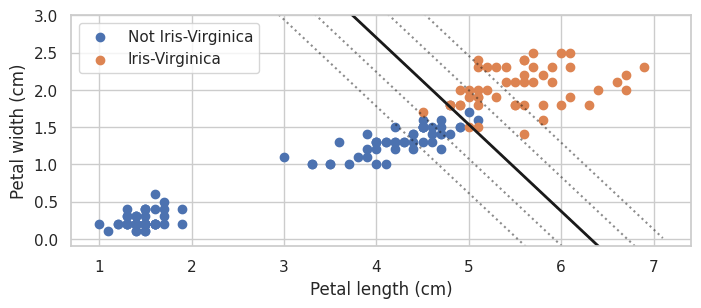

In [47]:
_, ax = plt.subplots(figsize=(8, 3))

# label the boundary as 0.5
for p, boundary in boundaries.items():
    ax.plot(x_ticks, boundary, color='k', ls=':', alpha=0.5)
ax.plot(x_ticks, boundaries[0.5], color='k', lw=2)

for filt, lbl in [(y == 0, 'Not Iris-Virginica'), (y == 1, 'Iris-Virginica')]:
    ax.scatter(X[filt][:, 0], X[filt][:, 1], label=lbl)

ax.set_ylim(-0.1, 3)
ax.set_xlabel('Petal length (cm)')
ax.set_ylabel('Petal width (cm)')
plt.legend()
plt.show()